# DV Python Question- 6

6. Use the matplotlib.pyplot package to create a 2 by 2 visualization.  The first row should show the daily cases and the moving average for Broward county, and the second row should show this information for Palm Beach county.  Note that you will first have to extract the data for the two counties from the data source you created in 5 (15 points).

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
df_2020 = pd.read_csv('2020 Cases only.csv',low_memory = False)
df_2021 = pd.read_csv('2021 Cases only.csv',low_memory = False)
df_all = pd.concat([df_2020,df_2021])

In [36]:
#selecting data based on county
Broward_Total = df_all[df_all['County'] == 'Broward'] 
Palm_Beach_Total = df_all[df_all['County'] == 'Palm Beach']

In [31]:
Broward_Total_all = df_all.groupby(['EventDate']).count()
print(Broward_Total_all.head)
Palm_Beach_Total_all = df_all.groupby(['EventDate']).count()
print(Palm_Beach_Total_all.head)

<bound method NDFrame.head of            OBJECTID  County    Age  Age_group  Gender  Jurisdicti  Travel_rel  \
EventDate                                                                       
1/1/2020          0      21     21         21      21          21          21   
1/1/2021          0   13720  13719      13720   13720       13720       13720   
1/10/2020         0       2      2          2       2           2           2   
1/10/2021         0   11694  11693      11694   11694       11694       11694   
1/11/2021         0   14249  14245      14249   14249       14249       14249   
...             ...     ...    ...        ...     ...         ...         ...   
9/5/2020          0    2545   2544       2545    2545        2545        2545   
9/6/2020          0    2217   2217       2217    2217        2217        2217   
9/7/2020          0    2478   2477       2478    2478        2478        2478   
9/8/2020          0    2699   2698       2699    2699        2699        2699  

In [32]:
from datetime import datetime
Broward_Total_all.index = pd.to_datetime(Broward_Total_all.index, format="%m/%d/%Y")
Broward_Total_all_sorted = Broward_Total_all.sort_index(axis='index', ascending=True)
print(Broward_Total_all_sorted.head)
Palm_Beach_Total_all.index = pd.to_datetime(Palm_Beach_Total_all.index, format="%m/%d/%Y")
Palm_Beach_Total_all_sorted = Palm_Beach_Total_all.sort_index(axis='index', ascending=True)
print(Palm_Beach_Total_all_sorted.head)

<bound method NDFrame.head of             OBJECTID  County   Age  Age_group  Gender  Jurisdicti  Travel_rel  \
EventDate                                                                       
2020-01-01         0      21    21         21      21          21          21   
2020-01-02         0       4     4          4       4           4           4   
2020-01-03         0       1     1          1       1           1           1   
2020-01-04         0       8     8          8       8           8           8   
2020-01-05         0       1     1          1       1           1           1   
...              ...     ...   ...        ...     ...         ...         ...   
2021-05-20         0    1936  1934       1936    1936        1936        1936   
2021-05-21         0    1831  1828       1831    1831        1831        1831   
2021-05-22         0    1286  1285       1286    1286        1286        1286   
2021-05-23         0    1026  1026       1026    1026        1026        1026  

In [33]:
Broward_Total_all_sorted['Date'] =Broward_Total_all_sorted.index.values
Broward_Total_all_sorted['Daily Cases'] = Broward_Total_all_sorted['County']
Broward_Total_all_sorted['Moving Average'] = Broward_Total_all_sorted['County'].rolling(5).mean()
Palm_Beach_Total_all_sorted['Date'] =Palm_Beach_Total_all_sorted.index.values
Palm_Beach_Total_all_sorted['Daily Cases'] = Palm_Beach_Total_all_sorted['County']
Palm_Beach_Total_all_sorted['Moving Average'] = Palm_Beach_Total_all_sorted['County'].rolling(5).mean()

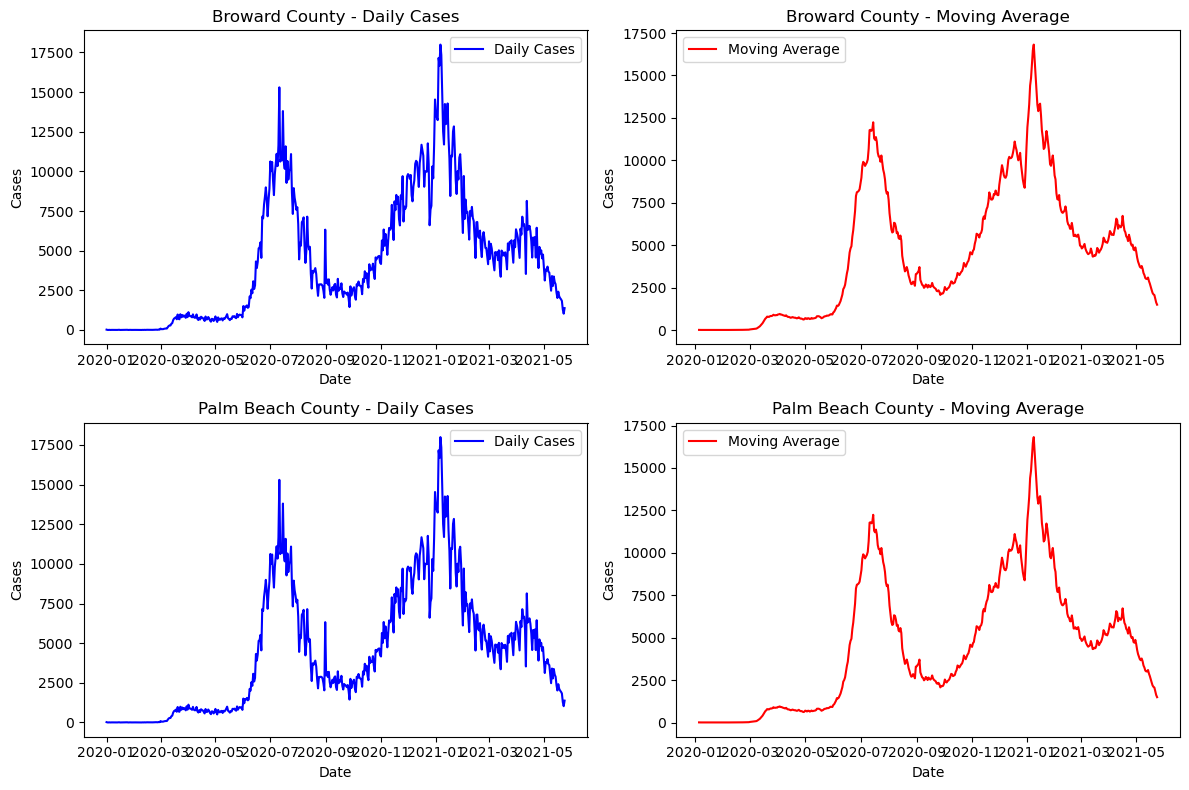

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(Broward_Total_all_sorted['Date'], Broward_Total_all_sorted['Daily Cases'], label='Daily Cases', color='blue')
axes[0, 0].set_title('Broward County - Daily Cases')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Cases')
axes[0, 0].legend()

# Broward County - Moving Average
axes[0, 1].plot(Broward_Total_all_sorted['Date'], Broward_Total_all_sorted['Moving Average'], label='Moving Average', color='red')
axes[0, 1].set_title('Broward County - Moving Average')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Cases')
axes[0, 1].legend()

# Palm Beach County - Daily Cases
axes[1, 0].plot(Palm_Beach_Total_all_sorted['Date'], Palm_Beach_Total_all_sorted['Daily Cases'], label='Daily Cases', color='blue')
axes[1, 0].set_title('Palm Beach County - Daily Cases')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Cases')
axes[1, 0].legend()

# Palm Beach County - Moving Average
axes[1, 1].plot(Palm_Beach_Total_all_sorted['Date'], Palm_Beach_Total_all_sorted['Moving Average'], label='Moving Average', color='red')
axes[1, 1].set_title('Palm Beach County - Moving Average')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Cases')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()